# TP n°2 

## Jeanne Malécot 
## Clément Dardare 

In [19]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import scipy.signal

## Part 1 : Two-channek filter bank
---



### Question 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


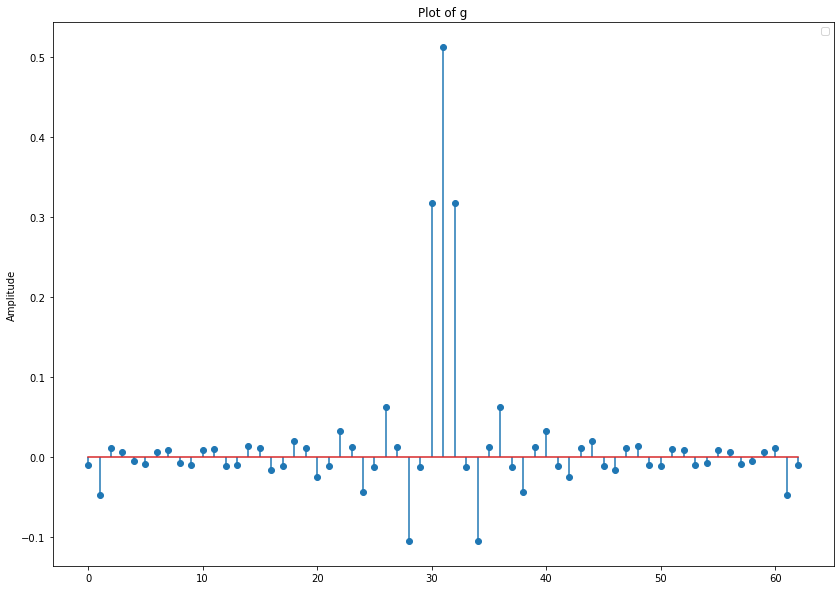

In [35]:
#filter params definition
N=32
nu_c = 1/4
e = 1/80

#filter
g = scipy.signal.remez(2*N-1, [0,nu_c, nu_c+e, 1/2], [1,0])


plt.figure(figsize=(14,10))
plt.title("Plot of g")
plt.stem(g)
plt.ylabel("Amplitude")
plt.legend()
plt.show()

> We can see that the _half-band_ condition does not hold : one of two coefficient are clearly not zero.

### Question 2

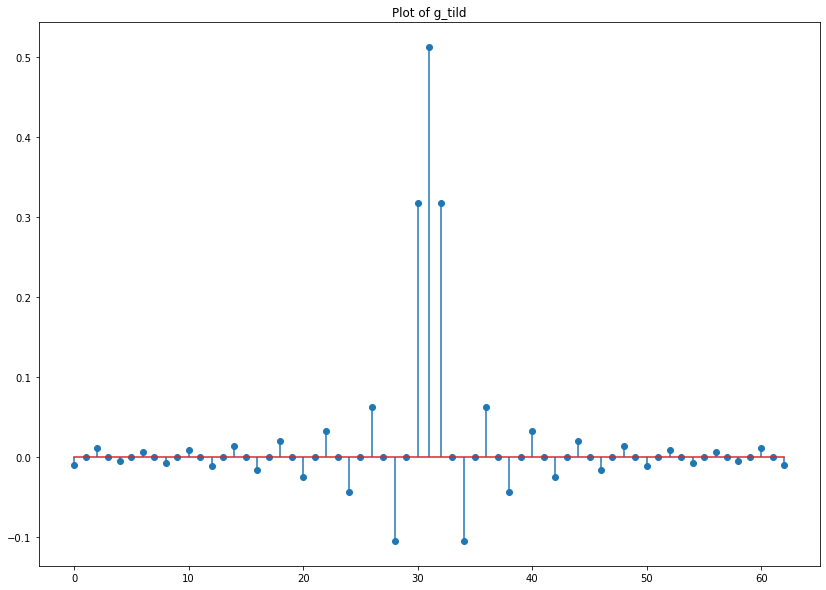

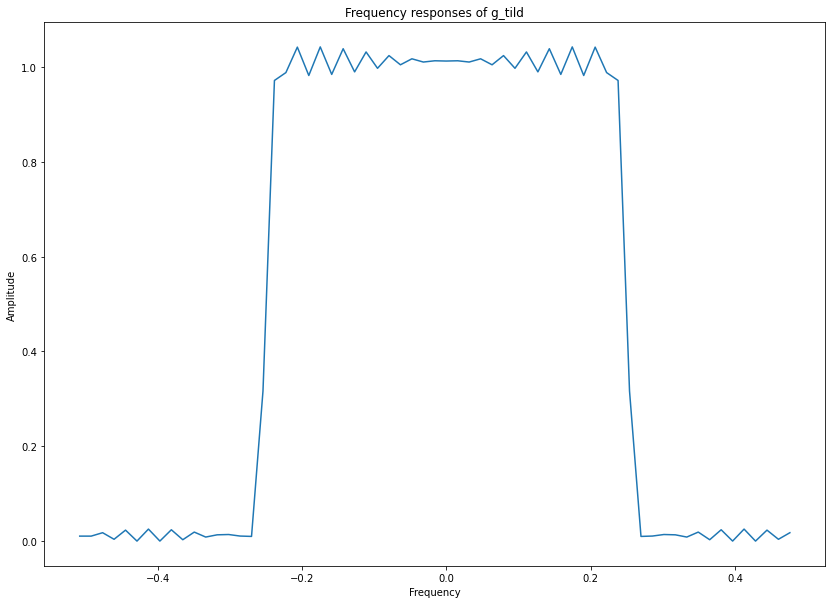

In [39]:
g_tild = scipy.signal.remez(2*N-1, [0,nu_c, nu_c+e, 1/2], [1,0]) #copie de g
l_g = len(g_tild)

for i in range (l_g) :
    if i % 2 != 0 and i != l_g //2 :
        g_tild[i] = 0

plt.figure(figsize=(14,10))
plt.title("Plot of g_tild")
plt.stem(g_tild)
plt.show()

plt.figure(figsize=(14,10))
plt.title("Frequency responses of g_tild")

plt.xlabel("Frequency")
plt.ylabel("Amplitude")

filter = np.abs(np.fft.fft(g_tild))
f_size = filter.shape[0]

filter = np.concatenate((filter[f_size//2 :], filter[:f_size//2]))
abs = np.arange(-f_size//2, f_size//2)/f_size

plt.plot(abs, filter)
plt.show()


> We can see that *g_tild* does not respect the Chebyshev alternance property.

### Question 3

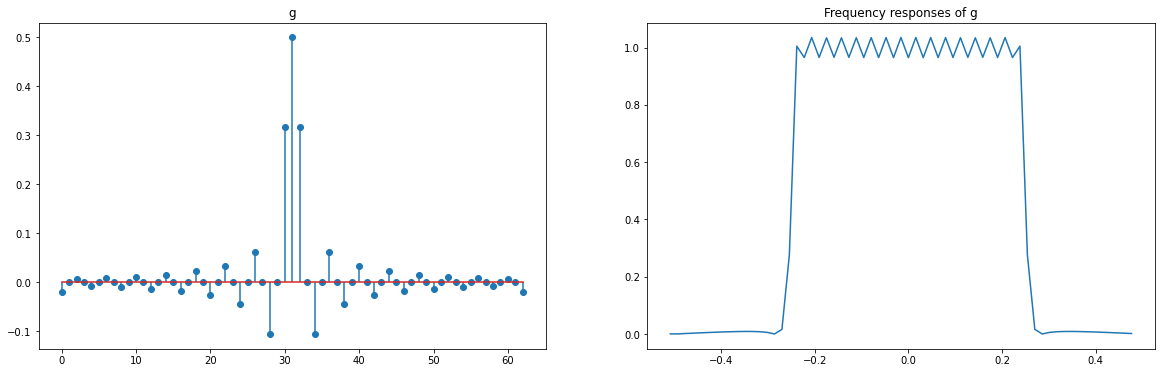

In [56]:
#new filter params definition
N=32
nu_c = 0.48
e = 0.02

#nearly all-pass filter
v = scipy.signal.remez(N, [0,nu_c, nu_c+e, 1/2], [1,0])

#building of the low-pass filter g 
c = 0.5
dirac = np.array([0]*(N-1) + [1] + [0]*(N-1))
v_2 = np.insert(v, range(1,len(v)), 0)  #v 2-upsampled

g = np.add(c*dirac, c*v_2)

#plot
filter = np.abs(np.fft.fft(g))
f_size = filter.shape[0]

filter = np.concatenate((filter[f_size//2 :], filter[:f_size//2]))
abs = np.arange(-f_size//2, f_size//2)/f_size

fig = plt.figure(figsize=(20,6))
fig.add_subplot(121).set_title('g')
plt.stem(g)

fig.add_subplot(122).set_title('Frequency responses of g')
plt.plot(abs, filter)

plt.show()

---
### Question 4

c:\Users\jeann\anaconda3\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\jeann\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\jeann\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


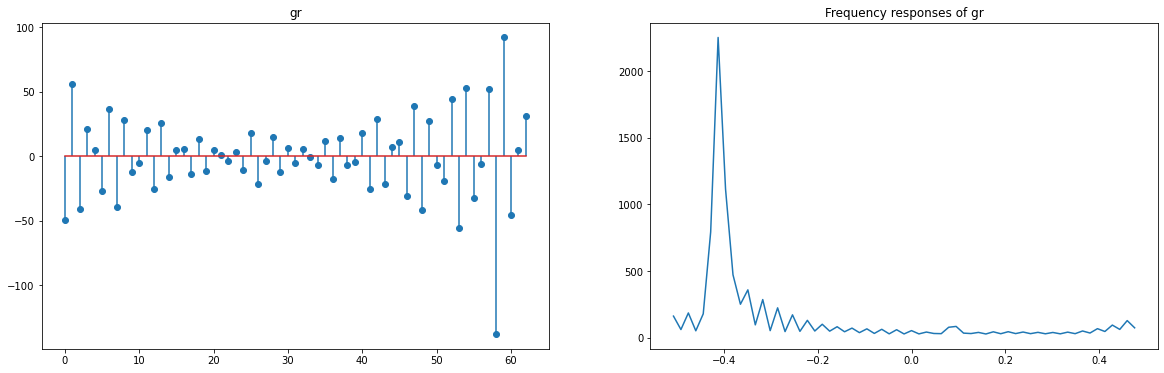

In [65]:
# Obtains the filter gr by doing the inverse Fourrier transformation of Gr(ν) = |G(ν)|*exp(j2πν(N-1))
freq = abs
freq = freq/(2*np.pi)

Gr_freq = [filter[k]*np.exp(2j*np.pi*freq[k]*(N-1)) for k in range (len(freq))]
gr = np.fft.ifft(Gr_freq)

#plot
filter = np.abs(np.fft.fft(gr))
f_size = filter.shape[0]

filter = np.concatenate((filter[f_size//2 :], filter[:f_size//2]))
abs = np.arange(-f_size//2, f_size//2)/f_size

fig = plt.figure(figsize=(20,6))
fig.add_subplot(121).set_title('gr')
plt.stem(gr)

fig.add_subplot(122).set_title('Frequency responses of gr')
plt.plot(abs, filter)

plt.show()